## **Protocol for measuring two type of coherent errors**


## **Overview**


A coherent error refers to a case where on top of the ideal control Hamiltonian that represents the ideal circuit, there are additional terms that may arise from miscalibration or from additional uncontrolled interaction between the qubits such as the z-z interaction in superconductor qubits.

Formally this is described by  $H=H_{ideal}(t)+\delta H(t)$ where $\delta H(t)$ represents the coherent error. 
In principle, if $\delta H(t)$  is known, it is possible to compensate for it by adjusting the control signal. However, this coherent error is often unknown and may slowly change in time due to laser frequency drifts and so on.
Crucially, $\delta H(t)$ is a deterministic quantity that does not statistically fluctuates from shot to shot. The possibility of fluctuation in the control belongs to the incoherent error discussed next. To reduce coherent error, the IBMQ devices have one major calibration each day and several smaller calibrations during the day. As such, the chances of using a device with coherent errors due to outdated calibration are high.
In a single qubit, coherent errors often manifests as over-rotation or under-rotation. Furthermore, it can simply affect the evolution as follow:


\begin{equation}
   \rho   = e^{i \epsilon \hat{n} \sigma }\rho_{0}\:e^{-i \epsilon \hat{n} \sigma },
\end{equation}


where $\epsilon$ represents the angle of overrotation on the wanted state $\rho_0$, we distinguish between two types of coherent errors: The two have different origins, but more importantly, they have different behavior. 

## Controllable Coherent Errore

This type typically appears due to miscalibration such as over-rotation. Consider the case where a pulse is too strong so that instead of $\pi$ pulse, it creates a $(1.05 \pi)$. In the absence of noise, if we reverse all the control signal that generates the Hamiltonian, the inverse operation will generate $(-1.05 \pi)$. That is, if the inverse operation is executed right after the original operation, the over-rotation in the inverse will cancel the over-rotation in the original rotation leading to the creation of the identity operator.

Rigorously if $H(t)$ is the ideal schedule that generates $U$ and $H'(t)$ contains the controllable error leading to $U'$. The ideal inverse schedule $H_I(t)=-H(T-t)$ will generate $U^\dagger$ . The inverse with the controllable error $H_I'(t)=-H'(T-t)$ will generate $U'^\dagger$. Thus we are running $H'(t)$, and then sequentially $H_I'(t)$, we still get the identity operator since $(U'^\dagger U'=I)$.


## Uncontrollable Coherent Errore

There is a term in the Hamiltonian we do not control $\delta H$ such that  $H'(t)=H(t)+\delta H$ and  $H_I(t)=-H(T-t)+\delta H$. Note that, in this case, $\delta H$  has not changed the sign when running the inverse since it is a term in the Hamiltonian we cannot control. Consequently, in uncompensated errors $(U'^\dagger U'\neq I)$. We will also refere to uncompensated coherent errors and uncotrollable coherent errors.
Our main finding is the ability to distinguish between these two types of coherent errors and quantify their contribution to the total coherent error. This seemingly simple task becomes convoluted when there are incoherent errors (noise) as well in the system. 


## **The implementation of the protocal**

Before we proceed to the protocol let us briefly introduce the `PCEP`method and the`K_IK`$ technique. 

PCEP (purity change estimation via periodicity) is a method for evaluating the incoherent errors et al [REF].  This PCEP variant involves carrying out n experiments, where in each individual experiment, the original circuit is duplicated n times. We denoted n by the number of cycles. Each experiment starts with an initial state $\rho_0$. At the end of each duplicated sequence, the survival probability is measured  $R=Tr(\rho_0\rho_n)$, where $\rho_n$ is the state at the end of n cycles of periodic evolution. The robustness of PCEP depends on the number of cycles.A quantity noted by $\sigma_n$ is introduced in [REF].  $\sigma_n$  is defined as the weighted sum of the survival probabilities $R_n$ with a coefficient $w_n$ as follow 

\begin{align}
    \sigma_n = \sum_{j}^{(n)}{w_j^{(n)} R_j} = \Big\langle \rho_0 \Big| \sum_{j=0}^{n}{w_j^{(n)}\: e^{n(-\frac{i}{\hslash }\mathcal{H}+\mathcal{L})}}\Big|\rho_0 \Big\rangle.
\end{align}


We write $R_n$ in Liouville space as $R_n =\left\langle \rho_0^{\dagger}|\rho_n \right\rangle= \left\langle \rho_0|\rho_n \right\rangle$, where $|\rho_n⟩$ is the flatten density matrix. Note that $w_j^{(n)}$ contains both positive and negative coefficients. In fact $\sum_{j}^{(n)}w_j^{(n)}=0$ where we prove in [REF]. Therefore the resulting $\sigma_2$ in terms of $R_n$ is : 

\begin{align}
    \sigma_2 = \frac{3}{2}R_0-2R_1+\frac{1}{2}R_2.
\end{align}


We show in [REF] a relation between incoherent error and $\sigma_2$, for higher order $\sigma_n$ different coefficients will be obtained. Thus, the only requirement to estimate the incoherent errors is to measure the survival probabilities for different cycles. 

The $K_IK$ technique adapts to the noise level of the system, where K is the evolution operator 

\begin{equation*}
     K(t) \simeq U(t) \:e^{  \Omega_1},
 \end{equation*}

where $e^{ \Omega_1}$ is the evolution operator by means of first order Magnus expansion. KI is the pulse inverse as the noisy evolution generated by executing $HI(t) = −H(T − t)$ (which refer to the reverse pulse schedule used for K.). In the absence of noise $HI(t)$ generate $U(t)^{\dagger}$. However, in the presence of noise, it was shown in [REF] that it generates KI, which is equal to
 
 \begin{align}
  K_I(t) =  \:e^{\Omega_1 + O(\Omega_2)}U(t)^{\dagger}\simeq \:e^{ \Omega_1}U(t)^{\dagger}
 \end{align}

Thus, by executing $K$ and $K_I$  sequentially we obtain that
 \begin{align}
  K_IK = e^{ \Omega_1} U(t)^{\dagger} U(t)e^{ \Omega_1}= e^{ 2\Omega_1}.
 \end{align}
 
Crucially, if there is some coherent error, it is possible to represent it by: 

\begin{align}
    K_IK\simeq e^{ \delta \mathcal{H}(t)+2\Omega_1}.
\end{align}

  
Howeve, not all coherent errors are the same, therefore, we can write $\delta \mathcal{H}(t) = -A + B$, where A refers to controllable coherent errors. B is the amplitude of an uncontrollable interaction that generates an uncontrollable
coherent errors. 

Now back to our protocol, This is achieved by applying `RC` (randomized compiling) at different levels of the execution of the circuit, and its inverse. There are various alternatives for integrating RC with PCEP. These different options are illustrated in Fig below.  

* RC at level  of $K$, will be sensitive to all types of error since the RC converts both controllable and uncontrollable coherent errore into an incoherent error that the PCEP can quantify. 
* RC at the level of $K_IK$ is expected to be sensitive to incoherent error and uncontrollable coherent errore. By construction,controllable coherent errors do not appear in $K_IK$.

**Note**: A detailed review on PCEP and KIK methods are far beyond the scope of this tutorial, we refer the enthusiastic readers to the following review papers [5] by Raam Uzdin and Jader Perira and Ivan Henao.



In the FIG below the single qubit gates represnet the randomised compiling gates, we also wirte them as RC or rc.

where $L_{1,2},R_{1,2} \in \{\sigma_x,\sigma_y,\sigma_z, I\}$, and  $R_{1}\otimes R_{2}$ is chosen to undo the twirling of $L_{1}\otimes L_{2}$. $L_{1,2}$.
And they can be easily obtained in the following way if k is the CNOT gate

\begin{align}
    \Big(L_{1}\otimes L_{2}\Big)=CNOT\:\Big(R_{1}\otimes R_{2}\Big)\:CNOT.
\end{align}$L_{1,2}$ is guaranteed to be a Pauli since the CNOT is a Clifford gate. 

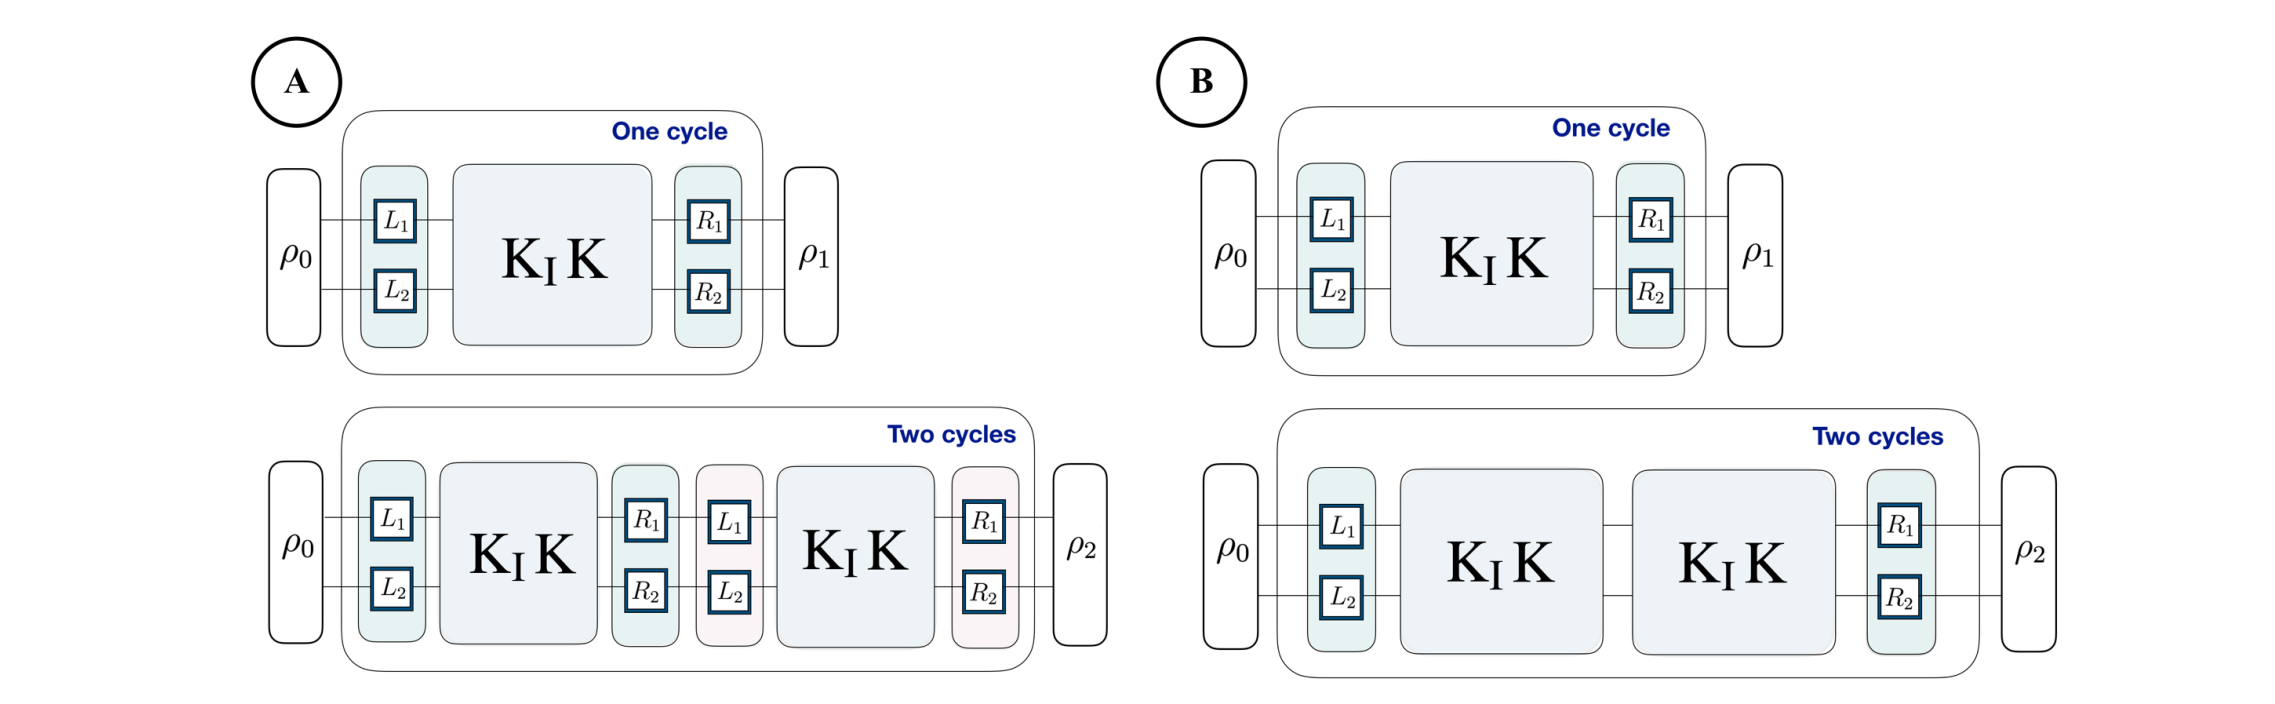


**RC at level of 𝐾**

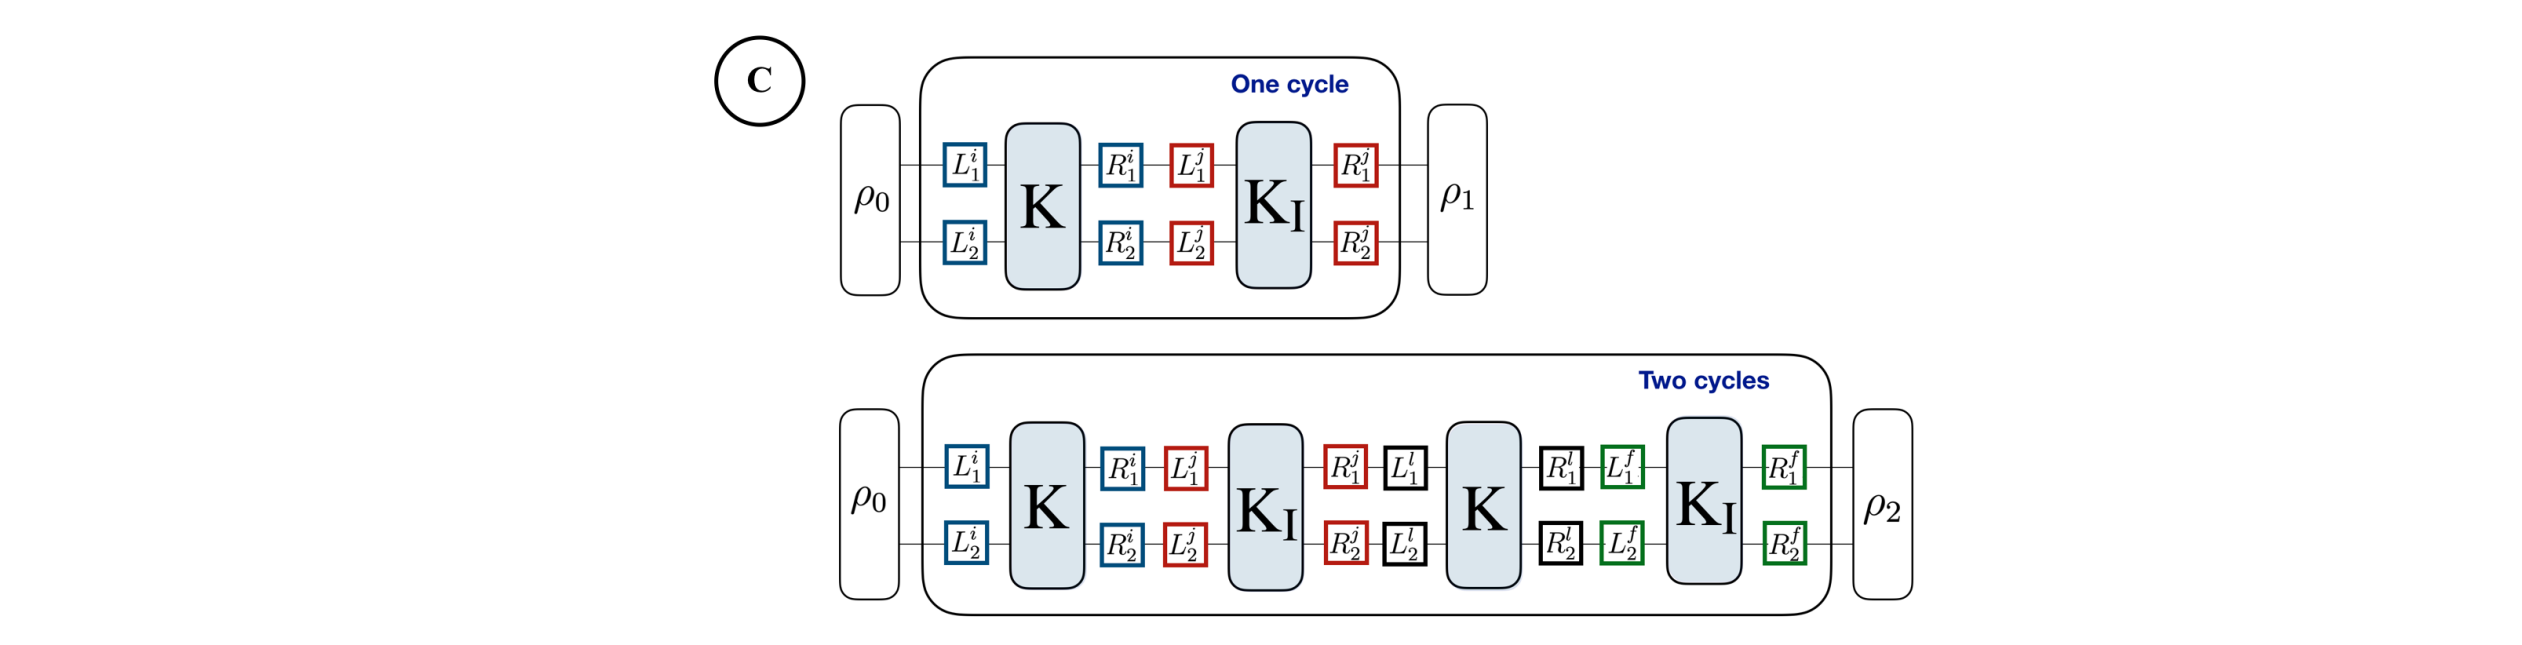

# **Reverse pulse schedule**

First of all, let us import the necessary libraries and packages

In [ ]:
import time
import random

import numpy as np
import itertools
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import BasicAer

from qiskit import *

from qiskit.visualization.pulse_v2 import draw, IQXSimple, IQXDebugging, IQXStandard
from qiskit.providers.fake_provider import FakeAlmaden

import importlib, sys

from math import factorial
from qiskit import pulse
from qiskit import transpile
from qiskit import schedule
from qiskit import QuantumCircuit 
from qiskit.circuit import Gate

# Eliminate noisy python warnings
import warnings
warnings.filterwarnings("ignore")

## Helpler classes

We will use the following classes for generating the inverse pulse schedule of a given circuit

In [ ]:
class ScheduleManipulation():
   
    """ Schedule manipulation of a given circuit for a specific backend 
    
    """

    def __init__(self, circ, backend):  
        self.circ = circ
        self.backend = backend
        self.num_qubits = circ.num_qubits   
    
    def local_barrier(self, *arg): 
        with pulse.build(self.backend, name='barrier') as local_barrier_v1:
            for i in range(self.backend.configuration().n_qubits):
                pulse.barrier(i)
        local_barrier_v2 = pulse.transforms.block_to_schedule(local_barrier_v1)
        return local_barrier_v2
    
    
    def forward_sched(self):
        """ Regular schedule 
        
        """
        return schedule(circuits = self.circ, backend = self.backend) # , method='alap'          

    
    def backward_sched(self):
        """ The inverse schedule """
   
        def reverse_sig(x):
            """ Inverse the amplitude of the signal in each channel
            
            """
            if type(x) == pulse.instructions.phase.ShiftPhase:
                return pulse.instructions.phase.ShiftPhase(-x.phase, x.channel)
            elif type(x) == pulse.instructions.delay.Delay:
                return x
            elif type(x) == pulse.instructions.play.Play:
                if type(x.pulse) == pulse.library.symbolic_pulses.GaussianSquare:
                    return pulse.instructions.Play(pulse.GaussianSquare(x.pulse.duration, -x.pulse.amp, x.pulse.sigma, x.pulse.width, name=x.pulse.name),x.channel, x.name)
                elif type(x.pulse) == pulse.library.symbolic_pulses.Drag:
                    return pulse.instructions.Play(pulse.Drag(x.pulse.duration, -x.pulse.amp, x.pulse.sigma, x.pulse.beta, name=x.pulse.name),x.channel, x.name)
                elif type(x.pulse) == pulse.library.waveform.Waveform:
                    return pulse.instructions.Play(pulse.Waveform((-1)*np.flip(x.pulse.samples), name=x.pulse.name),x.channel, x.name)
                elif x.pulse.pulse_type == 'GaussianSquare':
                    return pulse.instructions.Play(pulse.GaussianSquare(x.pulse.duration, -x.pulse.amp, x.pulse.sigma, x.pulse.width, name=x.pulse.name),x.channel, x.name)
                elif x.pulse.pulse_type == 'Drag':
                    return pulse.instructions.Play(pulse.Drag(x.pulse.duration, -x.pulse.amp, x.pulse.sigma, x.pulse.beta, name=x.pulse.name),x.channel, x.name)   
                else:
                    raise SyntaxError('error') 
                    sys.exit(1) 
            else:
                raise SyntaxError('error') 
                sys.exit(1) 
                
        sched = schedule(self.circ, self.backend)
        channel = [sched.filter(channels=sched.channels[i]) for i in range(len(sched.channels))]
        duration = sched.duration
        new_sched = pulse.Schedule()      
       
        for i in range(len(sched.channels)):
            
            def reversing_amp_and_phase(i): 
                amp_phase_reverse =  tuple(list(map(reverse_sig, np.array(channel[i].instructions)[::,1])))
                return amp_phase_reverse
            def channel_duration(i): 
                return channel[i].duration
            
            tab = tuple(list(zip(tuple(list(map(lambda x: duration-(x.duration), np.array(channel[i].instructions)[::,1]))- np.array(channel[i].instructions)[::,0]),reversing_amp_and_phase(i))))
            channel_sched = pulse.Schedule(*tab)
            if channel_sched.duration == duration:
                new_sched += channel_sched
            elif duration > channel_sched.duration:
                completing_duration = duration-channel_sched.duration
                new_sched += channel_sched + pulse.Schedule(pulse.instructions.delay.Delay(completing_duration, channel_sched.channels[0]))
            else:
                raise SyntaxError('Error: inconvenient duration')
                sys.exit(1)   
                
        return new_sched



The class that construct circuits of kik, k, and ki operations

In [ ]:


class Kik(ScheduleManipulation):
    """  
        Build the circuits associated with the kik, k, and ki operations. 
    """
    def __init__(self, circ, backend):
        #Initialize attributes of the parent class.
        super().__init__(circ, backend)    
    
    def construct_circuit( self, order, method_1 = 'gate', name_circ = 'KIK'):
        
        pulse_inv_sched = self.forward_sched() + self.local_barrier() + self.backward_sched()
        
        if name_circ == 'K': 
            pulse_inv_sched = self.forward_sched()
    
        if name_circ == 'KI': 
            pulse_inv_sched = self.backward_sched()
            
        forward_sched = self.forward_sched()
        drive_list = forward_sched.exclude(channels=list(
            itertools.chain(*[[pulse.AcquireChannel(i),pulse.MeasureChannel(i),pulse.ControlChannel(i)] for i in range(100)])))
        drive_list = drive_list.channels
        num_qubits = len(drive_list)
        qubits = [drive_list[i].index for i in range(num_qubits)]

        name = f'KPIK({order})'
        kik_sched = pulse_inv_sched
        for i in range(order-1):
            kik_sched =  pulse_inv_sched + kik_sched
            
        if method_1 == 'open_pulse':
            return kik_sched
        
        elif method_1 == 'gate':
            if order == 0:
                circ = QuantumCircuit(self.backend.configuration().n_qubits)
                circ.id(qubits)
                return circ
            else:
                circuit = QuantumCircuit(q,c)
                my_gate = Gate(name=name_circ, num_qubits=num_qubits, params=[])  
                circuit.add_calibration(my_gate, qubits = qubits, schedule = kik_sched, params = None)
                circuit.append(my_gate, qubits)
                return circuit
        else: 
            raise SyntaxError('error') 
            sys.exit(1)

    def kik(self, order, method_1 = 'gate'):
        return self.construct_circuit(order, method_1)
        
            
    def k(self, order, method_1 = 'gate'):
        return self.construct_circuit(order, method_1, 'K')


    def ki(self, order, method_1 = 'gate'):
        return self.construct_circuit(order, method_1, 'KI')

                

The purpose of the code snippets provided below is to characterize the quantum processors of IBM under various types of errors. We will examine three main types of errors in this session.
1. The first type of error is referred to as **incoherent errors** or "native errors." We have described these errors in more detail in different sections of this session.

2. The second type of error we'll be exploring is **incoherent Pauli errors**. We'll extract information about these errors using our  protocol.

3. The last two errors we'll be studying are categorized as **coherent errors**. ->"controllable coherent errors" and "uncontrollable coherent errors."



In this code, we first need to identify the specific gate that will act as our "kik operation." This refers to the gate that will play the role of "k" in our analysis. Currently, the fidelity of two-qubit gates is not very high. Therefore, we will use the CNOT gate as our kik operation. The inverse operation of the CNOT gate, in terms of pulse sequences, will be represented by "ki" throughout this work.  




# Physical implementation of CNOT via pulse inverse

Pulses sequence profile for CNOT as disscused in the main text.  By implementing $CNOT_{forward}$ then $CNOT_{backward}$  the desired KIK is implemented. The circular arrows associated with the phase shift $R^Z_1(\pm \pi /2)$ and D1, U0 channels represent the drive channel (real) and control channel (imaginary) part respectively of the Cross Resonance.

In [ ]:
# test
from qiskit import transpile, schedule as build_schedule
from qiskit.providers.fake_provider import FakeHanoi

backend = FakeHanoi()
   
q = QuantumRegister(2)
c = ClassicalRegister(2)

circ_cnot = QuantumCircuit(q,c)
circ_cnot.cnot(0, 1)

circ = QuantumCircuit(q,c)

kiki = Kik(circ_cnot, backend)

circ = circ.compose(kiki.k(1))
circ.barrier()
circ = circ.compose(kiki.ki(1))
              

transpiled_circ = transpile(circ, backend)  # Undefined Hadamard is replaced by U1
schedule = build_schedule(transpiled_circ, backend)

schedule.draw()

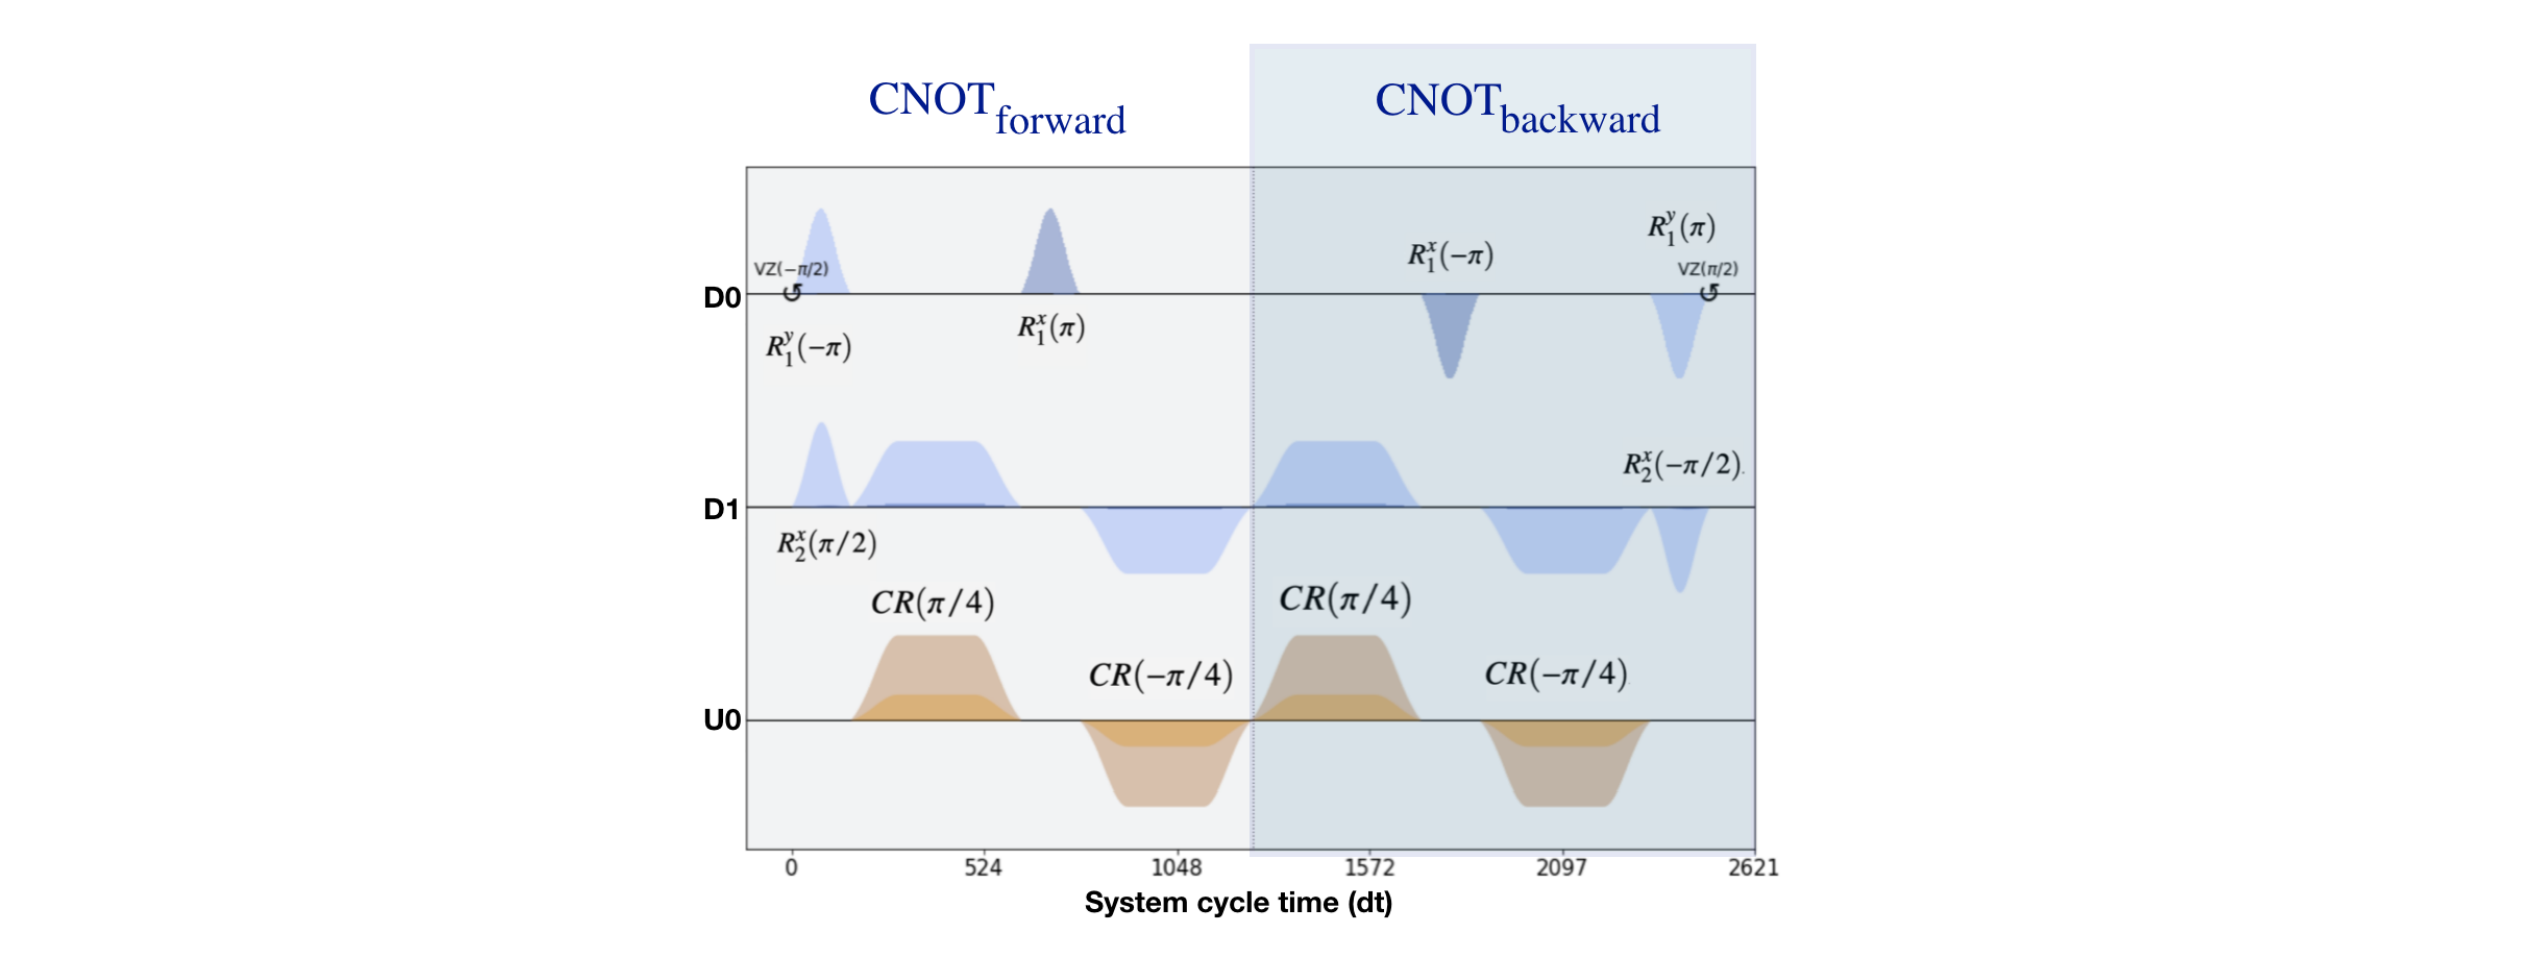

## Select IBM provider

In [ ]:
IBMQ.load_account()

provider0 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
ch_backend=provider0.get_backend('ibmq_quito')

## Generate circuits to implement kik protocol

The following class will create all the quantum circuits necessary for our protocol.


1- The method **build_batch_kik** creates a circuit containing only the kik operation, repeated multiple times or in "several cycles".

2- The next method, **build_batch_rc_on_kik** generates kik cycles where each operation is accompanied by RC gates. In other words, RC gates are applied to both the k and ki operations separately.


3- This **build_batch_rc_on_kik_cycle** method produces circuits where RC gates are applied to every combination of kik operations, including the identity operation, as we discussed earlier.

4- The **build_batch_rc_on_edge_circ** method creates circuits with several kik cycles, where RC gates are applied to all cycles but only from the outside, or at the edges of the circuit.



In [46]:
class GenerateCircuits():
    QUBIT_0 = 0
    QUBIT_1 = 1
        
    def __init__(self, realizations, length_rc_batch_list, q , c, qubits, n_states):
        self.realizations = realizations
        self.length_rc_batch_list = length_rc_batch_list
        self.q = q
        self.c = c
        self.qubits = qubits
        self.n_states = n_states
        
    def build_batch_kik(self, n_experiments):
        raise NotImplementedError

    def build_batch_rc_on_kik(self, n_cycles):
        raise NotImplementedError

    def build_batch_rc_on_kik_cycle(self, n_cycles):
        raise NotImplementedError
        
    def build_batch_rc_on_edge_circ(self, n_cycles):
        raise NotImplementedError
        
    def creat_calibration_circ(self):
        """ Add RC gates to the specified circuit based on a random selection
                from the RC gate list associated with the CNOT gate.
        """
        circ = []
        for i in range(4):
            circ.append(QuantumCircuit(self.q, self.c))

        circ[1].x(qubits[self.QUBIT_0])
        circ[1].barrier()

        circ[2].x(qubits[self.QUBIT_1])
        circ[2].barrier()

        circ[3].x(qubits[self.QUBIT_0])
        circ[3].barrier()

        circ[3].x(qubits[self.QUBIT_1])
        circ[3].barrier()

        for i in range(4):
            circ[i].measure(self.qubits[self.QUBIT_0], self.qubits[self.QUBIT_0])
            circ[i].measure(self.qubits[self.QUBIT_1], self.qubits[self.QUBIT_1])
        return circ 
        
    def add_rc_gates_cx(self, circ, rand_RC_gate_index, gate_level, qubit, qubit_order):
        """ Add to the given circuit the RC gates according to randome selction from 
                the RC gate list assoiated with cnot gate
        """
        a, b, c, d = 0, 1, 2, 3
        pq = [[a,a],[a,b],[a,c],[a,d],[c,a],[c,b],[c,c],[c,d],[b,a],[b,b],[b,c],[b,d],[d,a],[d,b],[d,c],[d,d]]
        rs = [[a,a],[a,b],[d,c],[d,d],[c,b],[c,a],[b,d],[b,c],[b,b],[b,a],[c,d],[c,c],[d,a],[d,b],[a,c],[a,d]]

        rc_list = pq
        if gate_level == 1:
            rc_list = rs

        gate_rc = rc_list[rand_RC_gate_index][qubit_order]

        if gate_rc == a:
            circ.i(qubit)
        elif gate_rc == b:
            circ.x(qubit)
        elif gate_rc == c:
            circ.y(qubit)
        elif gate_rc == d:
            circ.z(qubit)
        else:
            raise SyntaxError('error') 
        return circ

    def bulid_z_state_variation(self):
        """ This method generates a collection of initial states, which are then combined to 
                correct any overrotation in the initial state.
        """
        circuits = []
        for j in range(self.n_states):
            circ = QuantumCircuit(q,c)

            circ.barrier()

            if j == 1 or j == 3:
                circ.z(qubits[0])
            elif j == 2 or j == 3:
                circ.z(qubits[1])

            circ.barrier()

            circ.measure(self.qubits[0], self.qubits[0])
            circ.measure(self.qubits[1], self.qubits[1])

            circuits.append(circ)

        return circuits


The **Batches** class implements the method outlined in the **Generate Circuits** class. 

In [47]:
class Batches(GenerateCircuits):
    
    LEFT_RC_GATE = 0 # Add rc gate after the gate of intrest
    RIGHT_RC_GATE = 1 # Add rc gate before the gate of intrest

    def __init__(self, realizations, length_rc_batch_list, q , c, qubits, n_states):
        super().__init__(realizations, length_rc_batch_list, q , c, qubits, n_states)

    def kik_circuits(self,cycles):
        batch = []
        for cycle in range(cycles):
            for j in range(self.n_states):
                circ = QuantumCircuit(q, c)

                circ.barrier()
                
                if j == 1 or j == 3:
                    circ.z(qubits[0])
                elif j == 2 or j == 3:
                    circ.z(qubits[1])

                circ.barrier()

                for cyc in range(cycle+1):

                    circ_cnot = QuantumCircuit(self.q, self.c)
                    circ_cnot.cnot(qubits[0],qubits[1])
                    kiki = Kik(circ_cnot, ch_backend)

                    circ = circ.compose(kiki.ki(1))
                    circ.barrier()
                    circ = circ.compose(kiki.k(1))
                    circ.barrier()

                circ.measure(self.qubits[0], self.qubits[0])
                circ.measure(self.qubits[1], self.qubits[1])

                batch.append(circ)

        return batch
    
    def build_batch_kik(self, n_experiments):

        claibration_circ = self.creat_calibration_circ()        
        claibration_circ.extend(self.bulid_z_state_variation())
        
        for i in range(n_experiments):
            claibration_circ.extend(self.kik_circuits(1))

        return claibration_circ

    def rc_on_kik_circ(self, cycle):

        batch = []        
        for real in range(self.realizations):

            circ = QuantumCircuit(self.q, self.c)
            circ.barrier()

            
            for cyc in range(cycle):
                circ_cnot = QuantumCircuit(self.q, self.c)
                circ_cnot.cnot(qubits[0],qubits[1])
                rand_RC_gate_index = random.randint(0, 15)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[0],0)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[1],1)

                circ.barrier()
                
                kiki = Kik(circ_cnot, ch_backend)
                circ = circ.compose(kiki.ki(1))
                circ.barrier()
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.RIGHT_RC_GATE, self.qubits[0],0)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.RIGHT_RC_GATE, self.qubits[1],1)
                rand_RC_gate_index = random.randint(0, 15)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[0],0)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[1],1)

                circ.barrier()
                circ = circ.compose(kiki.k(1))
                circ.barrier()                
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.RIGHT_RC_GATE, self.qubits[0],0)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.RIGHT_RC_GATE, self.qubits[1],1)

                
            circ.measure(self.qubits[0], self.qubits[0])
            circ.measure(self.qubits[1], self.qubits[1])

            batch.append(circ)

        return batch


    def build_batch_rc_on_kik(self, n_cycles):

        claibration_circ = self.creat_calibration_circ()
        claibration_circ.extend(self.bulid_z_state_variation())
        
        for i in range(n_cycles):
            claibration_circ.extend(self.rc_on_kik_circ(i+1))

        return claibration_circ

    def rc_on_kik_cycle_circ(self, cycle):
        batch = [] 
        for real in range(self.realizations):
            circ = QuantumCircuit(self.q, self.c)
            circ.barrier()

            for cyc in range(cycle):
                circ_cnot = QuantumCircuit(self.q, self.c)
                circ_cnot.cnot(qubits[0],qubits[1])
                rand_RC_gate_index = random.randint(0, 15)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[0],0)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[1],1)

                circ.barrier()
                kiki = Kik(circ_cnot, ch_backend)

                circ = circ.compose(kiki.ki(1))
                circ.barrier()
                circ = circ.compose(kiki.k(1))
                circ.barrier()      

                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[0],0)
                circ = self.add_rc_gates_cx(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[1],1)

            circ.measure(self.qubits[0], self.qubits[0])
            circ.measure(self.qubits[1], self.qubits[1])

            batch.append(circ)

        return batch


    def build_batch_rc_on_kik_cycle(self, n_cycles):

        claibration_circ = self.creat_calibration_circ()
        claibration_circ.extend(self.bulid_z_state_variation())
        
        for i in range(n_cycles):
            claibration_circ.extend(self.rc_on_kik_cycle_circ(i+1))

        return claibration_circ
    
    def rc_on_edge_circ(self, cycle):
        batch = [] 
        for real in range(self.realizations):
            circ = QuantumCircuit(self.q, self.c)
            circ.barrier()
            
            circ_cnot = QuantumCircuit(self.q, self.c)
            circ_cnot.cnot(self.qubits[0], self.qubits[1])
            rand_RC_gate_index = random.randint(0, 15)

            circ = circ_add_rc_gate(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[0],0)
            circ = circ_add_rc_gate(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[1],1)

            circ.barrier()
            for cyc in range(cycle):
                kiki = Kik(circ_cnot, ch_backend)

                circ = circ.compose(kiki.ki(1))
                circ.barrier()
                circ = circ.compose(kiki.k(1))
                circ.barrier()      

            circ = circ_add_rc_gate(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[0],0)
            circ = circ_add_rc_gate(circ, rand_RC_gate_index, self.LEFT_RC_GATE, self.qubits[1],1)

            circ.measure(self.qubits[0], self.qubits[0])
            circ.measure(self.qubits[1], self.qubits[1])

            batch.append(circ)

        return batch


    def build_batch_rc_on_edge_circ(self, n_cycles):

        claibration_circ = self.creat_calibration_circ()
        claibration_circ.extend(self.bulid_z_state_variation())
        for i in range(n_cycles):
            
            claibration_circ.extend(self.rc_on_edge_circ(i+1))
        
        return claibration_circ



## Hyper-parameters

In [ ]:
qubits = [1,2]
q = QuantumRegister(qubits[1]+1)
c = ClassicalRegister(qubits[1]+1)
n_qubits = 2
n_states = 2**n_qubits
shots = 20000  
states = ['000', '010', '100', '110']

## Creat batches and send job to IBM backend

CREAT BATCH for KIK 

In [ ]:
n_experiments = 4
obj_batches = Batches(15, 100, q , c, qubits, n_states)
batch_1 = obj_batches.build_batch_kik(n_experiments)

SEND BATCH KIK JOB TO IBM 

In [ ]:
from qiskit import schedule

batch1_job = execute(batch_1, backend=ch_backend, shots=shots) 

CREAT BATCH for RC on both KI and K 

In [ ]:
obj_batches = Batches(15, 98, q , c, qubits, n_states)
max_n_cycles = 6
#                                                             size       4  15  15  15  15  15  15
rc_batch_1 = obj_batches.build_batch_rc_on_kik(max_n_cycles)# RC_per_k and ki  0,  1,  2,  3,  4,  5,  6
rc_batch_2 = obj_batches.build_batch_rc_on_kik(max_n_cycles)# RC_per_k and ki   0,1,2,3,4,5,6

 SEND  JOB of  the  BATCH for RC on both KI and K  to IBM backend   

In [ ]:
batch_rc_1_job = execute(rc_batch_1, backend=ch_backend, shots=shots) 
batch_rc_2_job = execute(rc_batch_2, backend=ch_backend, shots=shots) 

CREAT BATCH for RC on  KIK cycle

In [ ]:
obj_batches = Batches(15, 98, q , c, qubits, n_states)
max_n_cycles = 6

rc_batch_3 = obj_batches.build_batch_rc_on_kik_cycle(max_n_cycles)# RC_per_cycle  0,1,2,3,4,5,6
rc_batch_4 = obj_batches.build_batch_rc_on_kik_cycle(max_n_cycles)# RC_per_cycle. 0,1,2,3,4,5,6

SEND  JOB of  the  BATCH for RC on  KIK cycle to IBM backend   

In [ ]:
batch_rc_3_job = execute(rc_batch_3, backend=ch_backend, shots=shots) 
batch_rc_4_job = execute(rc_batch_4, backend=ch_backend, shots=shots) 


 CREAT BATCH for RC on circuit's edge 

In [ ]:
obj_batches = Batches(15, 98, q , c, qubits, n_states)
max_n_cycles = 6

rc_batch_5 = obj_batches.build_batch_rc_on_edge_circ(max_n_cycles)# RC_per_circuit  0,1,2,3,4,5,6
rc_batch_6 = obj_batches.build_batch_rc_on_edge_circ(max_n_cycles)# RC_per_circuit. 0,1,2,3,4,5,6

 SEND  JOB of  the  BATCH for RC on  circuit edge to IBM backend 

In [ ]:

batch_rc_5_job = execute(rc_batch_5, backend=ch_backend, shots=shots) 
batch_rc_6_job = execute(rc_batch_6, backend=ch_backend, shots=shots) 

## Analyse the data obtained from the completed job.

In [ ]:
class Data():
    
    def __init__(self, is_to_calibrate, length_rc_batch_list, num_states):
        self.length_rc_batch_list = length_rc_batch_list
        self.is_to_calibrate = is_to_calibrate
        self.num_states = num_states
    
    from numpy.linalg import inv

    def inverse_detector_matrix(self, counts):
        detector_noise_matrix = []
        for i in range(num_states):  
            cc = counts[i]
            l = []
            for j in range(num_states):
                if cc.get(states[j]) != None:
                    ele = int(cc.get(states[j]))
                    l.append(ele/shots)
                else:
                    l.append(0)
            detector_noise_matrix.append(l)

        matrix = np.array(detector_noise_matrix) # Matrix of detector v 
        matrix = np.transpose(matrix)
        return inv(matrix)   # Inverse matrix of detector 

    def apply_detector_matrix(self, counts, mat_invers):
        if self.is_to_calibrate:
            x = [0.0]*self.num_states 
            for i in range(self.num_states ):   
                if counts.get(states[i]) != None:
                    val = counts[states[i]]
                else :
                    val = 0
                x[i] = val/shots
            xx = mat_invers.dot(x)
            for j in range(self.num_states):
                counts[states[j]] = xx[j] 
            return counts
        else:
            x = [0.0]*self.num_states 
            for i in range(self.num_states ):   
                if counts.get(states[i]) != None:
                    val = counts[states[i]]
                else :
                    val = 0
                x[i] = val/shots
            for j in range(self.num_states ):
                counts[states[j]] = x[j] 
            return counts

    def get_survival_probability(self, job):

        r_list_counts, calibration_counts  = [], []
        result = job.result

        for i in range(self.num_states):
            calibration_counts.append(result.get_counts(i))

        mat_invers = inverse_detector_matrix(calibration_counts)
        for i in range(self.length_rc_batch_list - self.num_states ):

            counts_one_circ = result.get_counts(i + self.num_states )
            corrected_counts = apply_detector_matrix(counts_one_circ, mat_invers)

            r_list_counts.append(corrected_counts[states[0]])

        return r_list_counts


**Creat data analyst** for kik without randomised compiling

In [ ]:

from statistics import mean

obj_data_cali = Data(length_rc_batch_list = 98, is_to_calibrate = 1, num_states = 4)
b1_list = obj_data_cali.get_survival_probability(batch1_job)

# The following list contain the sirvival probabilties about the batch of kik
sp_r0 = b1_list[0:4] 
kik1_sp = b1_list[4:28]                 
kik2_sp = b1_list[28:52]
kik3_sp = b1_list[52:76]
kik4_sp = b1_list[76:96]


**Creat data analyst** for RC per kik -> rc(ki)rc(k)

In [ ]:
obj_data_cali = Data(length_rc_batch_list = 98, is_to_calibrate = 1, num_states = 4)

rc_b1 = obj_data_cali.get_survival_probability(batch_rc_1_job)
rc_b2 = obj_data_cali.get_survival_probability(batch_rc_2_job)

rc_on_kik_r0 = obj_data_cali.rc_b1[0 : 4] + rc_b2[0 : 4]
rc_on_kik_r1 = obj_data_cali.rc_b1[4 :19] + rc_b2[4 :19]
rc_on_kik_r2 = obj_data_cali.rc_b1[19:34] + rc_b2[19:34]
rc_on_kik_r3 = obj_data_cali.rc_b1[34:49] + rc_b2[34:49]
rc_on_kik_r4 = obj_data_cali.rc_b1[49:64] + rc_b2[49:64]
rc_on_kik_r5 = obj_data_cali.rc_b1[64:79] + rc_b2[64:79]
rc_on_kik_r6 = obj_data_cali.rc_b1[79:94] + rc_b2[79:94]


**Creat data analyst** for the batch contain circuits of RC per Cycle 

In [ ]:
obj_data_cali = Data(length_rc_batch_list = 98, is_to_calibrate = 1, num_states = 4)

rc_b3_ = obj_data_cali.get_survival_probability(batch_rc_3_job)
rc_b4_ = obj_data_cali.get_survival_probability(batch_rc_4_job)

rc_on_cycle_r0 = rc_b3_[0 : 4] + rc_b4_[0 : 4]
rc_on_cycle_r1 = rc_b3_[4 :19] + rc_b4_[4 :19]
rc_on_cycle_r2 = rc_b3_[19:34] + rc_b4_[19:34]
rc_on_cycle_r3 = rc_b3_[34:49] + rc_b4_[34:49]
rc_on_cycle_r4 = rc_b3_[49:64] + rc_b4_[49:64]
rc_on_cycle_r5 = rc_b3_[64:79] + rc_b4_[64:79]
rc_on_cycle_r6 = rc_b3_[79:94] + rc_b4_[79:94]

**Creat data analyst**  for the batch contain circuits of RC per circuit meaning rc only on the edge

In [ ]:
obj_data_cali = Data(length_rc_batch_list = 98, is_to_calibrate = 1, num_states = 4)

rc_b5_ = obj_data_cali.get_survival_probability(batch_rc_5_job)
rc_b6_ = obj_data_cali.get_survival_probability(batch_rc_6_job)

rc_on_edge_r0 = rc_b3_[0 : 4] + rc_b4_[0 : 4]
rc_on_edge_r1 = rc_b3_[4 :19] + rc_b4_[4 :19]
rc_on_edge_r2 = rc_b3_[19:34] + rc_b4_[19:34]
rc_on_edge_r3 = rc_b3_[34:49] + rc_b4_[34:49]
rc_on_edge_r4 = rc_b3_[49:64] + rc_b4_[49:64]
rc_on_edge_r5 = rc_b3_[64:79] + rc_b4_[64:79]
rc_on_edge_r6 = rc_b3_[79:94] + rc_b4_[79:94]

## Plot results to extract four types of quantum errors for ibm-quito 

These errors are:
1. Incohernet errors
2. Incohernt errors Pauli
3. Total coherent errors
4. Uncontrollabel cohernet errors
5. Controllabel cohernet errors



In [ ]:
import  math

import numpy as np
import matplotlib.pyplot as plt


class PlotResult:
    
    def __init__(self):
        self.fig1_, self.axs1_ = plt.subplots(figsize=(6, 3))
        self.cycles = [2, 3, 4]
        self.max_cycle = self.cycles[-1]
        

    def plot_incoherent_error_vs_cycles(self):

        sp_kik_avg = [np.mean(sp_r0), np.mean(kik1_sp[0:4]), np.mean(kik1_sp[4:8]),np.mean(kik1_sp[8 :12 ]), np.mean(kik1_sp[12:16]),
                 np.mean(kik1_sp[16 :20 ]), np.mean(kik1_sp[20:24])]
        sp_kik2_avg = [np.mean(sp_r0), np.mean(KIK2_sirvR[0 :4 ]), np.mean(KIK2_sirvR[4 :8 ]),np.mean(KIK2_sirvR[8 :12 ]), np.mean(KIK2_sirvR[12 :16 ]),
                 np.mean(KIK2_sirvR[16 :20 ]), np.mean(KIK2_sirvR[16 :20 ])]

        sp_rc_edge_avg = [np.mean(rc_on_edge_r0), np.mean(rc_on_edge_r1), np.mean(rc_on_edge_r2),np.mean(rc_on_edge_r3), np.mean(rc_on_edge_r4), np.mean(rc_on_edge_r5),
                          np.mean(rc_on_edge_r6)]
        sp_rc_edge_avg = [rc_on_edge_r0, rc_on_edge_r1, rc_on_edge_r2, rc_on_edge_r3,rc_on_edge_r4, rc_on_edge_r5, rc_on_edge_r6]

        def get_stats(data):
            return [np.mean(d) for d in data], [np.std(d) for d in data]

        sp_rc_kik = [rc_on_kik_r0, rc_on_kik_r1, rc_on_kik_r2, rc_on_kik_r3, rc_on_kik_r4, rc_on_kik_r5,rc_on_kik_r6]
        sp_rc_cycle = [rc_on_cycle_r6, rc_on_cycle_r61,rc_on_cycle_r62, rc_on_cycle_r63, rc_on_cycle_r64, rc_on_cycle_r65, rc_on_cycle_r66]
        
        sp_rc_kik_avg, sp_rc_cnot_c_error = get_stats(sp_rc_kik)
        sp_rc_cycle_avg, sp_rc_cycle_error_c = get_stats(sp_rc_cycle)

        # ucce : uncontrollabel cohernet error
        # cce : controllabel cohernet error
        std = self.standard_diviation(sp_rc_kik, sp_rc_cycle, sp_rc_edge, sp_kik2_avg, 3)
        err_A1, err_A2, err_A3, err_A4, cce, ucce = std[0], std[1], std[2], std[3], std[4], std[5] 
        
        kik = self.get_infidelity(sp_kik_avg)
        kik_rc = self.get_infidelity(sp_rc_kik_avg)
        cycle_rc = self.get_infidelity(sp_rc_cycle_avg)
        edge_rc = self.get_infidelity(sp_rc_edge_avg)

        self.incoherent_error_vs_cycles(kik, err_A4, err_A3, err_A2, err_A1, kik_rc, edge_rc, cycle_rc, cce, ucce)
        
        self.plot_style('Order of incoherent infidelity', 'Incoherent infidelity')

    def standard_diviation(self, A1, A2, A3, A4, size_cyc):
        err_A1 = [np.std([self.incoherent_infidelity(i + 2, [np.mean(A1[0]), A1[1][j], A1[2][j], A1[3][j], A1[4][j], A1[5][j], A1[6][j]]) for j in range(len(A1))]) for i in range(size_cyc)]
        err_A2 = [np.std([self.incoherent_infidelity(i + 2, [np.mean(A2[0]), A2[1][j], A2[2][j], A2[3][j], A2[4][j], A2[5][j], A2[6][j]]) for j in range(len(A2))]) for i in range(size_cyc)]
        err_A3 = [np.std([self.incoherent_infidelity(i + 2, [np.mean(A3[0]), A3[1][j], A3[2][j], A3[3][j], A3[4][j], A3[5][j], A3[6][j]]) for j in range(len(A3))]) for i in range(size_cyc)]
        err_A4 = [np.sqrt(self.incoherent_infidelity(i + 2, [np.mean(A4[0]), A4[1], A4[2], A4[3], A4[4], A4[5], A4[6]]) * (1 - self.incoherent_infidelity(i + 2, [np.mean(A4[0]), A4[1], A4[2], A4[3], A4[4], A4[5], A4[6]])) / 30000) for i in range(size_cyc)]

        err_cce = np.sqrt(np.square(err_A1) + (np.square(err_A2)) / 4 + (np.square(err_A3)) / 4)
        err_ucce = np.sqrt(np.square(err_A2) / 4 + np.square(err_A3) / 4)

        return [err_A1, err_A2, err_A3, err_A4, err_cce, err_ucce]

    def incoherent_error_vs_cycles(self, kik, error_A4, error_A3, error_A2, error_A1, A1, A3, A2, err_cce, err_ucce):
        color = ['firebrick', 'navy', 'slategrey', 'mediumvioletred', 'cyan', 'black', 'seagreen', 'goldenrod']
        markme = 8
        line_thick = 2
    
        cce = np.array(A1) - np.dot((np.array(A2) + np.array(A3)), 1 / 2) # cce : controllabel cohernet error
        ucce = np.dot((np.array(A2) - np.array(A3)), 1 / 2)# ucce : uncontrollabel cohernet error
        # plt.ylim(-0.001, 0.024)
        
        self.axs1_.plot(self.cycles, kik, 'o-', linewidth=line_thick, label=r'Native noise', color=color[4], markersize=markme)
        self.axs1_.plot(self.cycles, A3, 'o-', linewidth=line_thick, label=r'Incoherent Pauli error', color=color[1], markersize=markme)
        self.axs1_.plot(self.cycles, A1, 'o-', linewidth=line_thick, label=r'Total coherent + incoherent error', color=color[3], markersize=markme)
        self.axs1_.plot(self.cycles, cce, 's-', linewidth=line_thick, label=r'Controlled coherent error', color=color[6], markersize=10)
        self.axs1_.plot(self.cycles, ucce, 's-', linewidth=line_thick, label=r'Uncontrolled coherent error', color=color[7], markersize=10)
        
        self.axs1_.errorbar(self.cycles, A1, yerr= error_A1, fmt='s', mfc='none', color=color[3], elinewidth=3, capsize=1)
        self.axs1_.errorbar(self.cycles, A3, yerr=error_A3, fmt='s', mfc='none', color=color[1], elinewidth=3, capsize=1)
        self.axs1_.errorbar(self.cycles, kik, yerr=error_A4, fmt='s', mfc='none', color=color[4], elinewidth=3, capsize=1)
        self.axs1_.errorbar(self.cycles, cce, yerr=err_cce, fmt='s', mfc='none', color=color[6], elinewidth=3, capsize=1)
        self.axs1_.errorbar(self.cycles, ucce, yerr=err_ucce, fmt='s', mfc='none', color=color[7], elinewidth=3, capsize=1)

    def co_(self, n, k):
        if k == 0:
            return 2 - (1 / n)
        else:
            return (pow(-1, k)) * (2 * (2 * n - 1) / n) * ((pow(math.factorial(n), 2)) / ((math.factorial(n - k)) * (math.factorial(n + k))))

    def incoherent_infidelity(self, order, list_R):
        in_in = 0
        for i in range(order + 1):
            in_in += self.co_(order, i) * list_R[i]
        return in_in

    def get_infidelity(self, list_sp):
        vec = []
        for i in range(self.max_cycle - 1):
            vec.append(self.incoherent_infidelity(i + 2, list_sp))

        return vec

    def plot_style(self, x_lable, y_lable):
        self.axs1_.tick_params(axis='x', labelsize=30)
        self.axs1_.tick_params(axis='y', labelsize=30)
        plt.xlabel(x_lable, fontsize=35, fontweight='ultralight')
        plt.ylabel(y_lable, fontsize=35, fontweight='ultralight')
        plt.locator_params(nbins=3)

        plt.legend(loc="upper left", prop={'weight': 'ultralight', "size": 15})
        plt.show()


 

In [ ]:
PlotResult.plot_incoherent_error_vs_cycles()

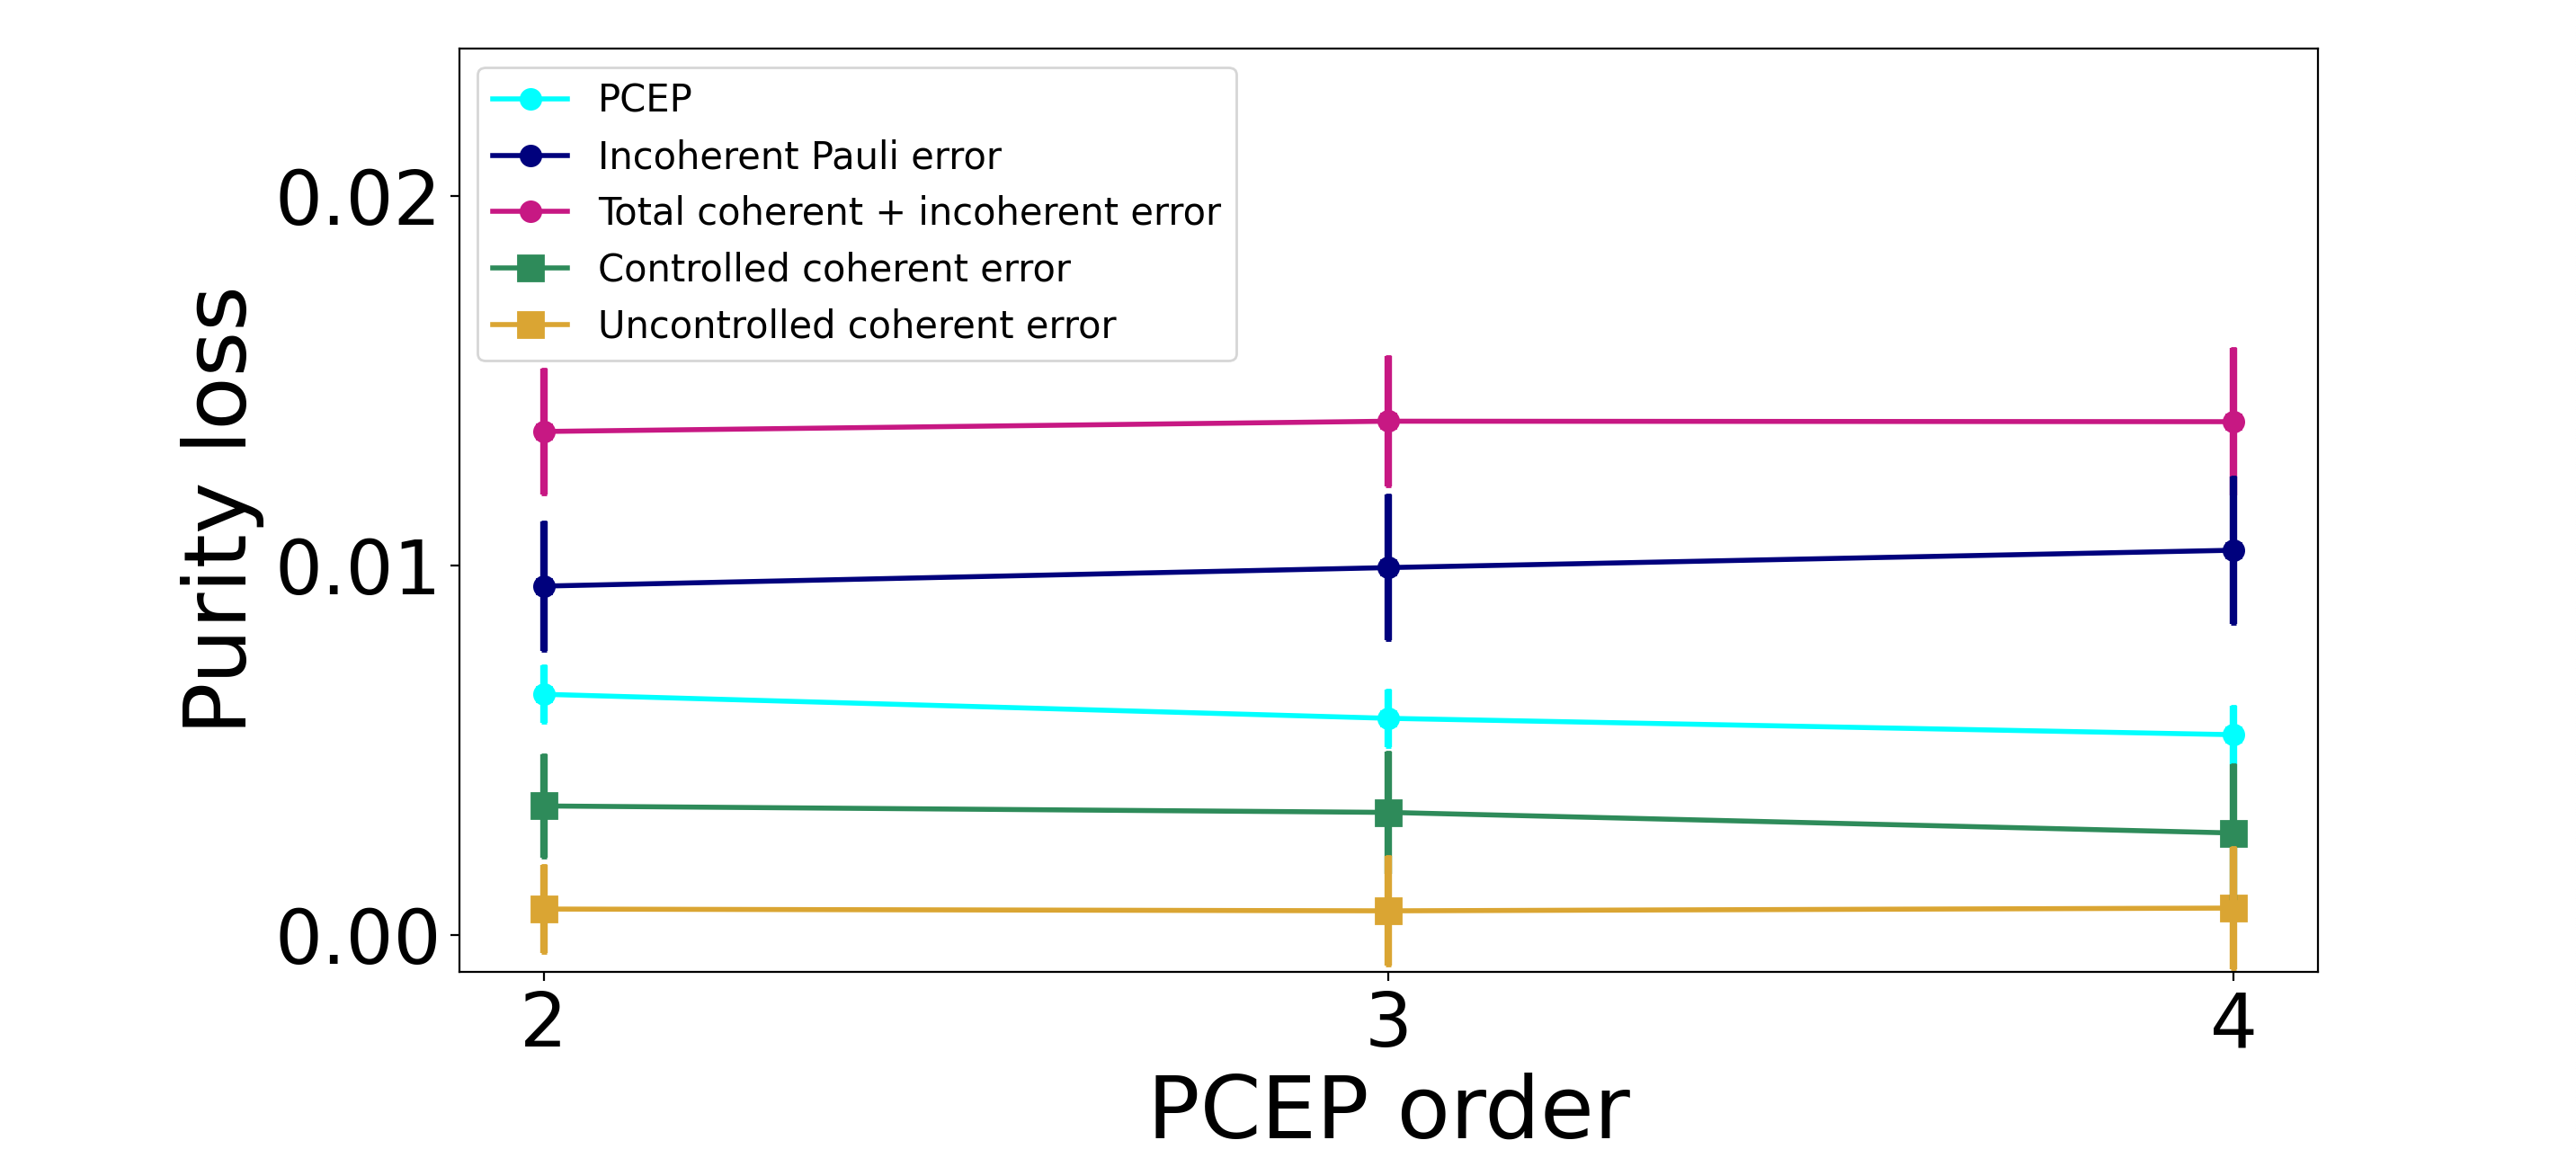
